# <center> Proyecto Final Inteligencia Artificial I </center>
<img src="http://localhost:8008/files/ProyectoFinal_IA/banner.jpeg" alt="Drawing" style="width:1000px;">

In [1]:
!pip install tensorflow
!pip install keras==2.0.6
!pip install np_utils

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-suppor

In [2]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

Using TensorFlow backend.


In [4]:
PATH = "../share/ProyectoIA/dataset/shapes/"
IMG_SIZE = 64
Shapes = ["circle", "square", "triangle", "star"]
Labels = []
Dataset = []
for shape in Shapes:
    print("Obteniendo datos para: ", shape)
    #iteración de cada archivo en las carpetas
    for path in os.listdir(PATH + shape):
        #Agregando imágenes a una lista
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        Dataset.append(image)
        Labels.append(Shapes.index(shape))

print("Dimension del Dataset:", len(Dataset))
print("Dimension de imagen:", Dataset[0].shape)
print("Dimension de labels:", len(Labels))

('Obteniendo datos para: ', 'circle')
('Obteniendo datos para: ', 'square')
('Obteniendo datos para: ', 'triangle')
('Obteniendo datos para: ', 'star')
('Dimension del Dataset:', 14970)
('Dimension de imagen:', (64, 64, 3))
('Dimension de labels:', 14970)


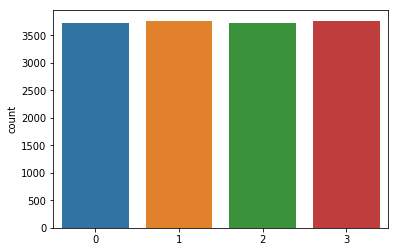

In [5]:
sns.countplot(x= Labels)

In [6]:
print("Cantidad de imagenes en Star:", Labels.count(Shapes.index("star")))
print("Cantidad de imagenes en Circle:", Labels.count(Shapes.index("circle")))
print("Cantidad de imagenes en Squares:", Labels.count(Shapes.index("square")))
print("Cantidad de imagenes en Trinagle:", Labels.count(Shapes.index("triangle")))

('Cantidad de imagenes en Star:', 3765)
('Cantidad de imagenes en Circle:', 3720)
('Cantidad de imagenes en Squares:', 3765)
('Cantidad de imagenes en Trinagle:', 3720)


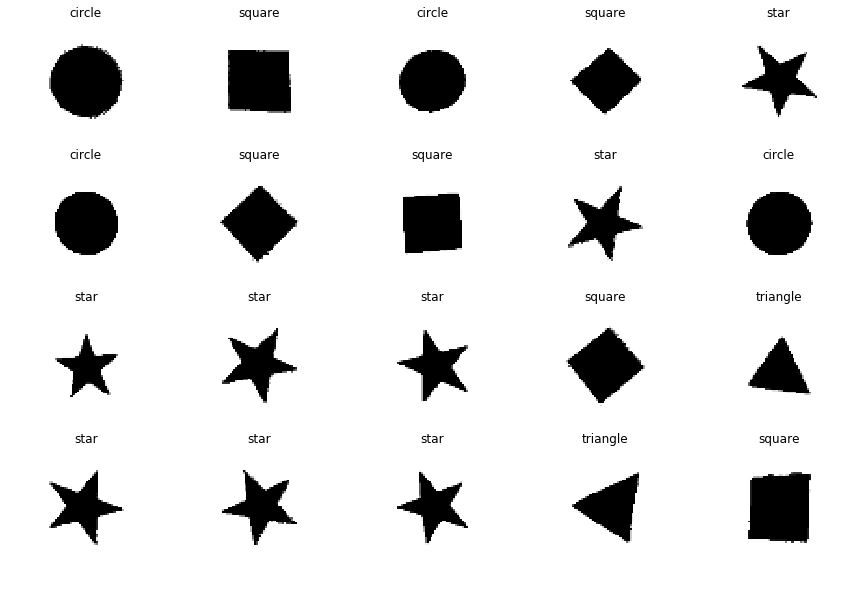

In [7]:
index = np.random.randint(0, len(Dataset) - 1, size= 20)
plt.figure(figsize=(15,10))

for i, ind in enumerate(index, 1):
    img = Dataset[ind]
    lab = Labels[ind]
    lab = Shapes[lab]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [8]:
Dataset = np.array(Dataset)
Dataset = Dataset.astype("float32") / 255

#Etiquetas
Labels = np.array(Labels)
Labels = to_categorical(Labels)

#División del Dataset para train\test
(trainX, testX, trainY, testY) = train_test_split(Dataset, Labels, test_size=0.2, random_state=42)

print("X Train shape:", trainX.shape)
print("X Test shape:", testX.shape)
print("Y Train shape:", trainY.shape)
print("Y Test shape:", testY.shape)

('X Train shape:', (11976, 64, 64, 3))
('X Test shape:', (2994, 64, 64, 3))
('Y Train shape:', (11976, 4))
('Y Test shape:', (2994, 4))


In [9]:
class LeNet():
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses,  pooling= "max", activation= "relu"):
        
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)

        model.add(Conv2D(filters= 6, kernel_size= 5, input_shape= inputShape))
        model.add(Activation(activation))

        if pooling == "max":
            model.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
        else:
            model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2)))

        model.add(Conv2D(filters= 16, kernel_size= 5))
        model.add(Activation(activation))

        if pooling == "avg":
            model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
        else:
            model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())
        model.add(Dense(120))
        model.add(Dropout(0.5))
        model.add(Activation(activation))

        model.add(Dense(84))
        model.add(Dropout(0.5))
        model.add(Activation(activation))

        model.add(Dense(numClasses))
        model.add(Activation("softmax"))

        return model

In [10]:
BS = 120
LR = 0.01
EPOCHS = 10
opt = SGD(lr= LR)

In [11]:
# Primer modelo con agrupación máxima.
model = LeNet.build(3, IMG_SIZE, IMG_SIZE, 4, pooling= "max")
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
__________

In [12]:
# Training
H1 = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= 120,
              epochs= EPOCHS, verbose=1)

# Evaluando train y test
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)

print("\nPrecision para agrupacion maxima de datos para train: %.2f%%" % (scores_train[1]*100))
print("Precision para agrupacion maxima de datos para test: %.2f%%" % (scores_test[1]*100))

Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 75s - loss: 1.1976 - acc: 0.4425 - val_loss: 0.6832 - val_acc: 0.8941
Epoch 2/10
11976/11976 [==============================] - 68s - loss: 0.7610 - acc: 0.6673 - val_loss: 0.3383 - val_acc: 0.9255
Epoch 3/10
11976/11976 [==============================] - 69s - loss: 0.4578 - acc: 0.8146 - val_loss: 0.1493 - val_acc: 0.9816
Epoch 4/10
11976/11976 [==============================] - 66s - loss: 0.2776 - acc: 0.8965 - val_loss: 0.1013 - val_acc: 0.9456
Epoch 5/10
11976/11976 [==============================] - 70s - loss: 0.1825 - acc: 0.9345 - val_loss: 0.0273 - val_acc: 0.9977
Epoch 6/10
11976/11976 [==============================] - 69s - loss: 0.1395 - acc: 0.9519 - val_loss: 0.0148 - val_acc: 0.9980
Epoch 7/10
11976/11976 [==============================] - 71s - loss: 0.0988 - acc: 0.9686 - val_loss: 0.0122 - val_acc: 0.9977
Epoch 8/10
11976/11976 [==============================]

In [13]:
# Segundo modelo con agrupación media.
model = LeNet.build(3, IMG_SIZE, IMG_SIZE, 4, pooling= "average")
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 60, 60, 6)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
__________

In [14]:
# Training
H2 = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,
              epochs= EPOCHS, verbose= 1)

# Evaluando train y test
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)

print("\nPrecision para agrupacion media de datos para train: %.2f%%" % (scores_train[1]*100))
print("Precision para agrupacion media de datos para test: %.2f%%" % (scores_test[1]*100))

Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 70s - loss: 1.1737 - acc: 0.4451 - val_loss: 0.6930 - val_acc: 0.8871
Epoch 2/10
11976/11976 [==============================] - 70s - loss: 0.7302 - acc: 0.6629 - val_loss: 0.3743 - val_acc: 0.9760
Epoch 3/10
11976/11976 [==============================] - 71s - loss: 0.4820 - acc: 0.8049 - val_loss: 0.1515 - val_acc: 0.9920
Epoch 4/10
11976/11976 [==============================] - 70s - loss: 0.2943 - acc: 0.8924 - val_loss: 0.0784 - val_acc: 0.9973
Epoch 5/10
11976/11976 [==============================] - 71s - loss: 0.1888 - acc: 0.9319 - val_loss: 0.0341 - val_acc: 0.9967
Epoch 6/10
11976/11976 [==============================] - 68s - loss: 0.1377 - acc: 0.9525 - val_loss: 0.0145 - val_acc: 0.9987
Epoch 7/10
11976/11976 [==============================] - 69s - loss: 0.0976 - acc: 0.9690 - val_loss: 0.0127 - val_acc: 0.9970
Epoch 8/10
11976/11976 [==============================]

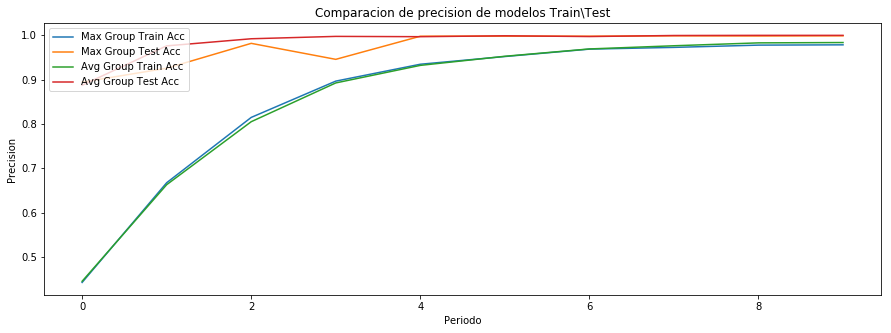

In [15]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, EPOCHS), H1.history["acc"], label="Max Group Train Acc")
plt.plot(np.arange(0, EPOCHS), H1.history["val_acc"], label="Max Group Test Acc")
plt.plot(np.arange(0, EPOCHS), H2.history["acc"], label="Avg Group Train Acc")
plt.plot(np.arange(0, EPOCHS), H2.history["val_acc"], label="Avg Group Test Acc")
plt.title("Comparacion de precision de modelos Train\Test")
plt.xlabel("Periodo")
plt.ylabel("Precision")
plt.legend(loc="upper left")

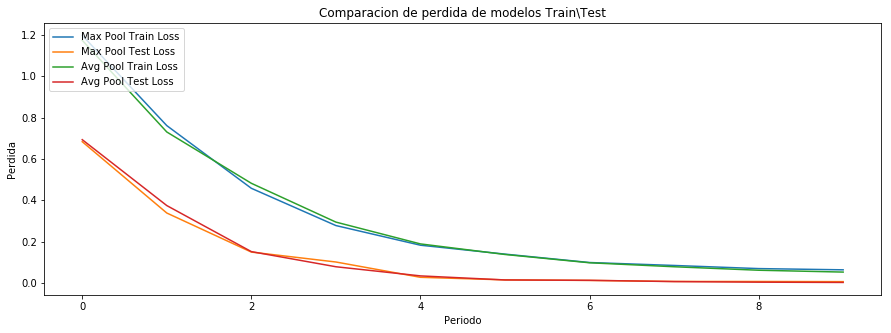

In [16]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, EPOCHS), H1.history["loss"], label="Max Pool Train Loss")
plt.plot(np.arange(0, EPOCHS), H1.history["val_loss"], label="Max Pool Test Loss")
plt.plot(np.arange(0, EPOCHS), H2.history["loss"], label="Avg Pool Train Loss")
plt.plot(np.arange(0, EPOCHS), H2.history["val_loss"], label="Avg Pool Test Loss")
plt.title("Comparacion de perdida de modelos Train\Test")
plt.xlabel("Periodo")
plt.ylabel("Perdida")
plt.legend(loc="upper left")